<a href="https://colab.research.google.com/github/Jose-Luis25/EstadisticaVerano/blob/main/PROYECTO_U2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INTRODUCCION

La diabetes es una enfermedad que afecta a muchas personas en el mundo.
La capacidad para predecir factores que influyen en el desarrollo de esta condición es clave para la prevención y el tratamiento oportuno.
En el siguiente proyecto, se utiliza una base de datos para investigar las relaciones entre variables clínicas y de estilo de vida con el nivel de glucosa en sangre, aplicando técnicas de regresión lineal múltiple y analisis.



## MARCO TEORICO

La regresión lineal múltiple es una técnica estadística que permite modelar la relación entre una variable dependiente continua y múltiples variables independientes. Esta técnica es útil cuando se busca explicar cómo varios factores influyen simultáneamente en una respuesta.

La correlación mide la intensidad y dirección de la relación lineal entre dos variables.

Los métodos que usamos, necesitan cumplir ciertos supuestos estadísticos asi como:
La Linealidad, la normalidad de los residuos y la Homocedasticidad (que tenga varianzas iguales).

## METODOLOGIA

Importación de datos: Se cargó un dataset con 100,000 registros relacionados con salud y diabetes.

Preprocesamiento:

-Eliminación de datos faltantes

-Transformación de variables categóricas mediante codificación


Se aplicó regresión lineal múltiple usando blood_glucose_level como variable dependiente y age, bmi, HbA1c_level, hypertension, heart_disease y smoking_history como predictoras.


Evaluación de supuestos:

Se analizaron los residuos del modelo, la normalidad y la multicolinealidad.

# IMPORTACION DE DATOS

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Jose-Luis25/EstadisticaVerano/refs/heads/main/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


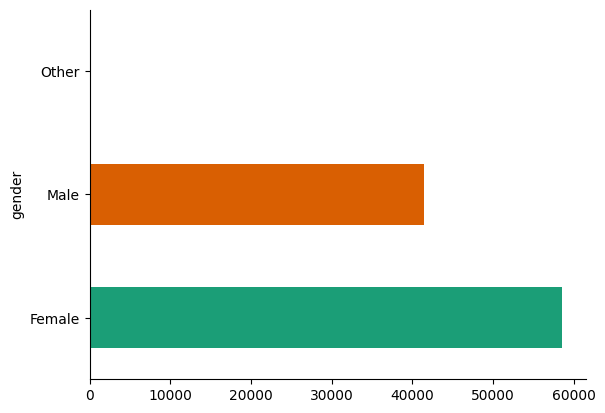

In [ ]:
# @title Genero

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['gender'] = df['gender'].map({"Male":0, "Female":1, "Other":2})
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,No Info,27.32,6.2,90,0
99996,1,2.0,0,0,No Info,17.37,6.5,100,0
99997,0,66.0,0,0,former,27.83,5.7,155,0
99998,1,24.0,0,0,never,35.42,4.0,100,0


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0213    0.0 -0.0255 -0.0171   True
     0      2  -0.0975 0.2987 -0.2515  0.0565  False
     1      2  -0.0762 0.4774 -0.2302  0.0778  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

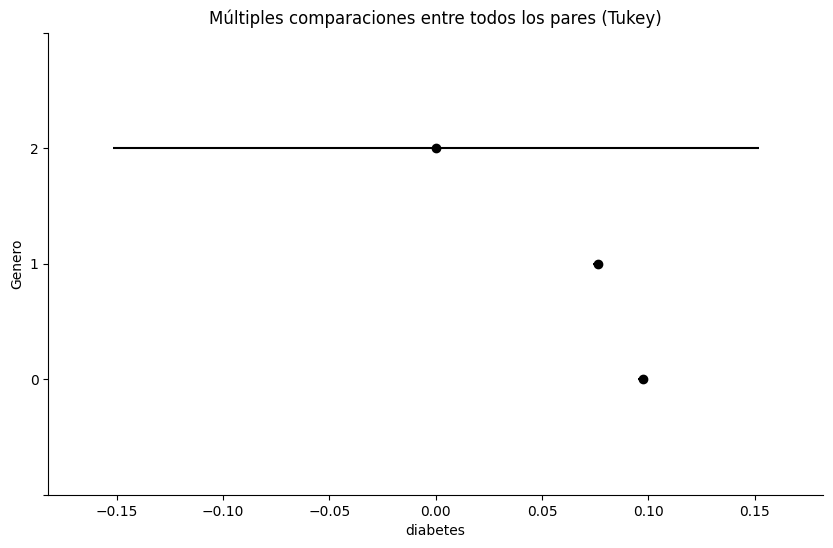

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['diabetes'], groups=df['gender'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Genero", xlabel="diabetes")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

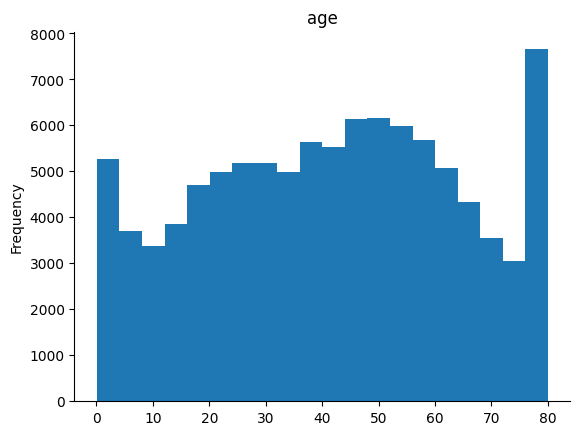

In [ ]:
# @title Edad

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

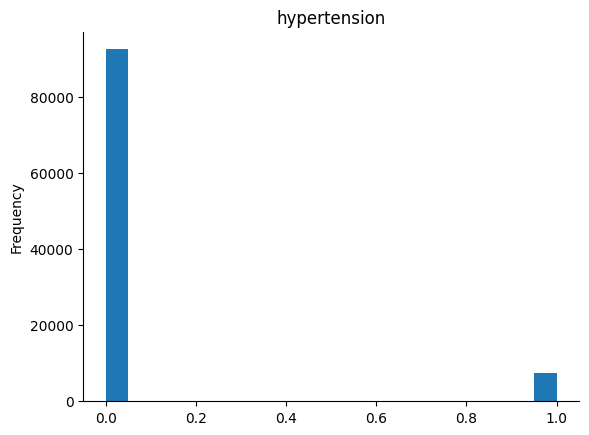

In [ ]:
# @title Hipertension

from matplotlib import pyplot as plt
df['hypertension'].plot(kind='hist', bins=20, title='hypertension')
plt.gca().spines[['top', 'right',]].set_visible(False)

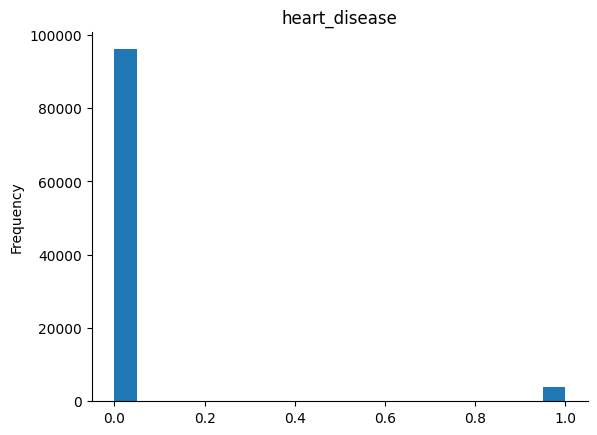

In [ ]:

# @title Enfermedad Cardiaca

from matplotlib import pyplot as plt
df['heart_disease'].plot(kind='hist', bins=20, title='heart_disease')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title Historial de Tabaquismo
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
df['smoking_history'] = df['smoking_history'].map({"never":0, "No Info":1, "current":2, "former":3, "ever":4, "not current":5})
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,1,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,1,27.32,6.2,90,0
99996,1,2.0,0,0,1,17.37,6.5,100,0
99997,0,66.0,0,0,3,27.83,5.7,155,0
99998,1,24.0,0,0,0,35.42,4.0,100,0


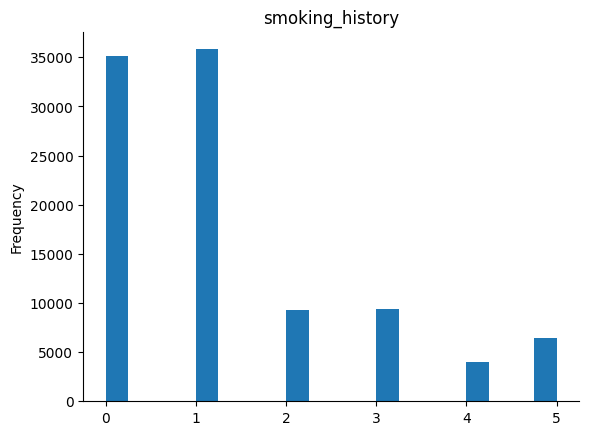

In [ ]:
from matplotlib import pyplot as plt
df['smoking_history'].plot(kind='hist', bins=20, title='smoking_history')
plt.gca().spines[['top', 'right',]].set_visible(False)

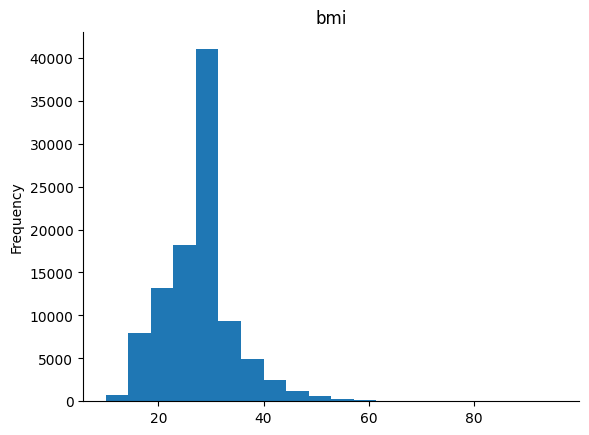

In [ ]:
# @title Indice de Masa Corporal

from matplotlib import pyplot as plt
df['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

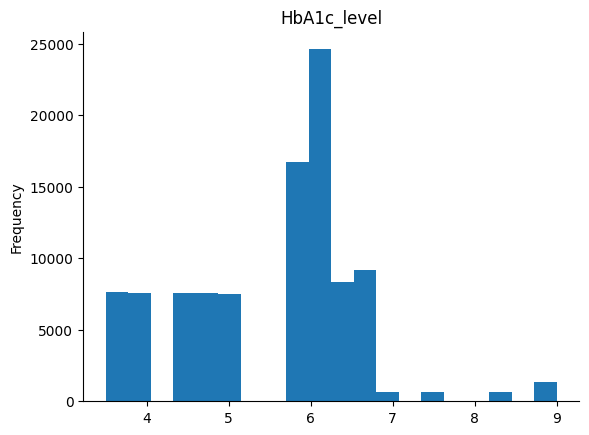

In [ ]:
# @title hemoglobina glucosilada

from matplotlib import pyplot as plt
df['HbA1c_level'].plot(kind='hist', bins=20, title='HbA1c_level')
plt.gca().spines[['top', 'right',]].set_visible(False)

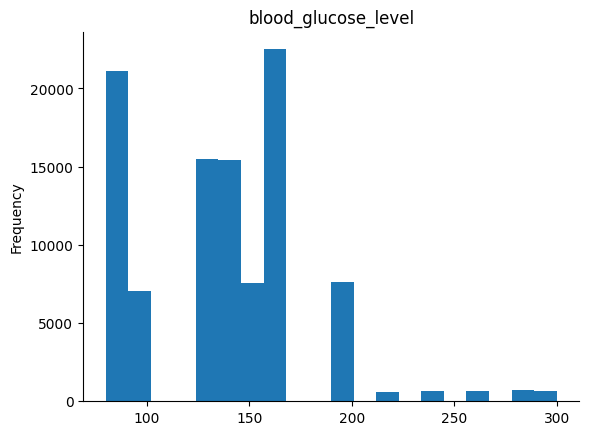

In [ ]:
# @title Nivel de Glucosa

from matplotlib import pyplot as plt
df['blood_glucose_level'].plot(kind='hist', bins=20, title='blood_glucose_level')
plt.gca().spines[['top', 'right',]].set_visible(False)

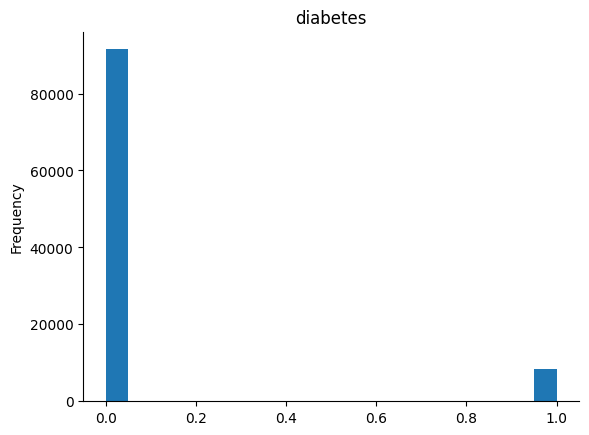

In [ ]:
# @title Diabetes

from matplotlib import pyplot as plt
df['diabetes'].plot(kind='hist', bins=20, title='diabetes')
plt.gca().spines[['top', 'right',]].set_visible(False)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'gender'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'hypertension'),
  Text(0, 3.5, 'heart_disease'),
  Text(0, 4.5, 'smoking_history'),
  Text(0, 5.5, 'bmi'),
  Text(0, 6.5, 'HbA1c_level'),
  Text(0, 7.5, 'blood_glucose_level'),
  Text(0, 8.5, 'diabetes')])

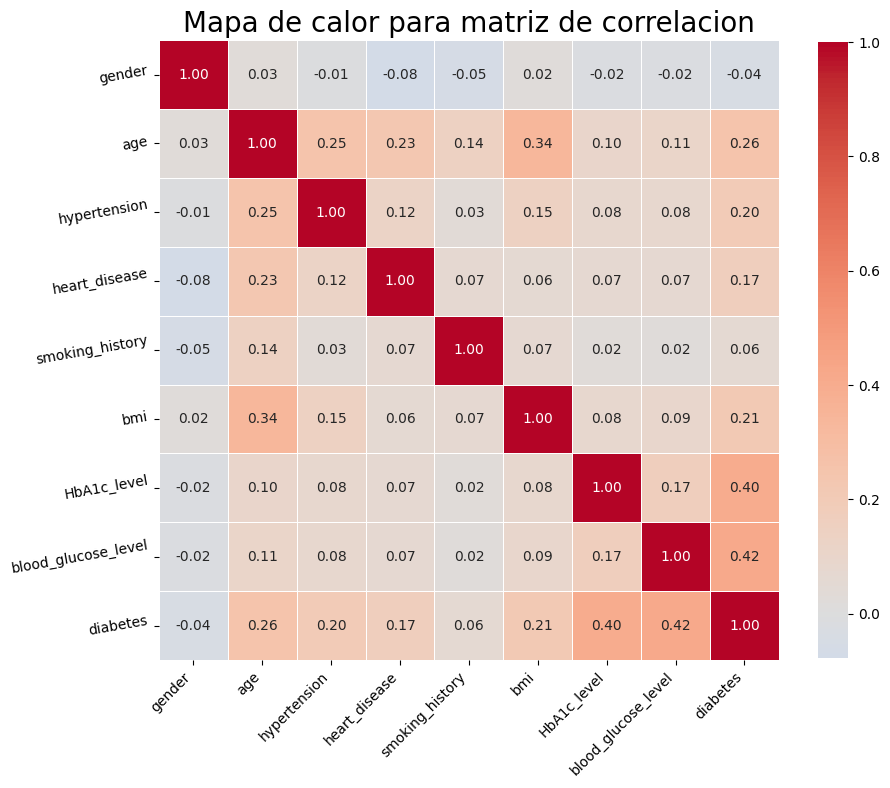

In [ ]:
# @title MAPA DE CALOR
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion=df.corr()
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(
    matriz_de_correlacion,#LO QUE VA A GRAFICAR
    annot=True,#SE MUESTRAN LOS VALORES EN LAS CELDAS
    fmt="0.2f",#0.2f SIGNIFICA "DOS DECIMALES"
    cmap="coolwarm",#PALETA DE COLORES
    square=True,#FORZA CUADRADOS
    linewidths=0.5,#GROSOR DE LINEAS
    cbar_kws={"shrink":0.8},#TAMAÑO BARRA LATERAL
    center=0
)
plt.title("Mapa de calor para matriz de correlacion", fontsize=20),
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=10)


Coeficiente de determinación:  0.1605

Intervalo de confianza para b1 de  95%
 0.1029 < b1 <  0.1058

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


,df,sum_sq,mean_sq,F,PR(>F)
HbA1c_level,1.0,1248.511869,1248.511869,19122.211184,0.0
Residual,99998.0,6528.988131,0.065291,NaN,NaN


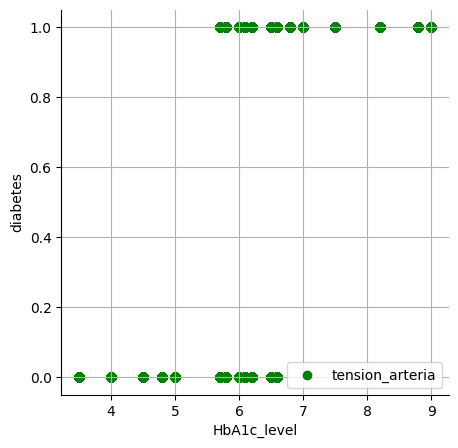

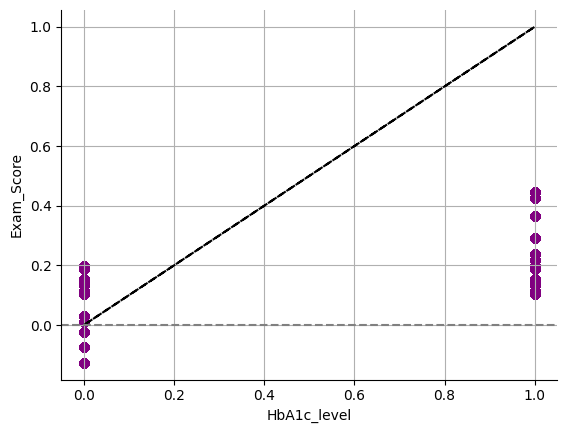

In [ ]:
x = df[["HbA1c_level"]]
y = df["diabetes"]


#Diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(x, y, label = "tension_arteria", color = 'green')
plt.xlabel("HbA1c_level") # nombrar eje x
plt.ylabel("diabetes") # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)
plt.legend()#APARECE LO QUE INDICA EL PUNTO
plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA


#Recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'black', linestyle = '--')



# Coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')



# Intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')


# Nuevo gráfico de dispersión.
residuales = modelo.resid
plt.scatter(y, yc, color = 'purple')
plt.xlabel("HbA1c_level")
plt.ylabel("Exam_Score")
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA


# Prueba de Shapiro para los residuales
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')



# Prueba de Brausch-Pagan para los residuales
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')



# Tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("diabetes ~ HbA1c_level", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

Coeficiente de determinación:  0.0686

Intervalo de confianza para b1 de  95%
-0.0292 < b1 < -0.0224

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,11.084662,11.084662,153.021442,4.020830e-35
age,1.0,522.770839,522.770839,7216.742294,0.000000e+00
Residual,99997.0,7243.644499,0.072439,NaN,NaN


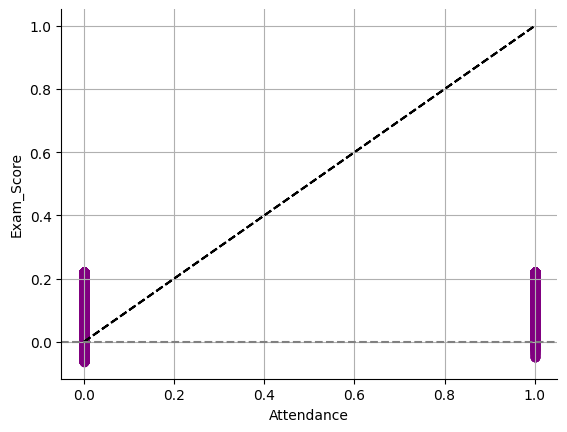

In [ ]:
x = df[["gender","age"]]
y = df["diabetes"]



#Recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'black', linestyle = '--')



# Coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')



# Intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')


# Nuevo gráfico de dispersión.
residuales = modelo.resid
plt.scatter(y, yc, color = 'purple')
plt.xlabel("Attendance")
plt.ylabel("Exam_Score")
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA


# Prueba de Shapiro para los residuales
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')



# Prueba de Brausch-Pagan para los residuales
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')



# Tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("diabetes ~ gender + age", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

Coeficiente de determinación:  0.0873

Intervalo de confianza para b1 de  95%
-0.0274 < b1 < -0.0207

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,11.084662,11.084662,156.139973,8.391928e-36
age,1.0,522.770839,522.770839,7363.817296,0.000000e+00
hypertension,1.0,144.745824,144.745824,2038.908297,0.000000e+00
Residual,99996.0,7098.898675,0.070992,NaN,NaN


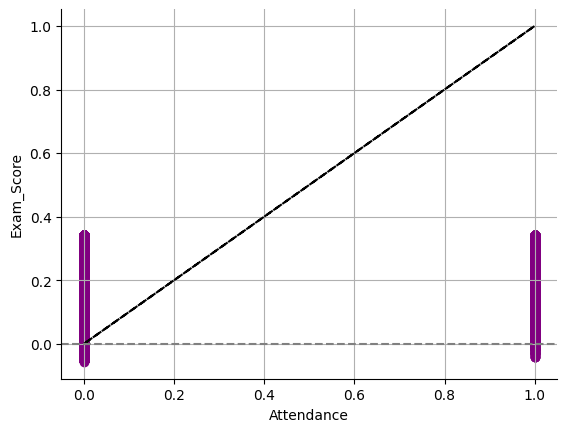

In [ ]:
x = df[["gender","age", "hypertension"]]
y = df["diabetes"]



#Recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'black', linestyle = '--')



# Coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')



# Intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')


# Nuevo gráfico de dispersión.
residuales = modelo.resid
plt.scatter(y, yc, color = 'purple')
plt.xlabel("Attendance")
plt.ylabel("Exam_Score")
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA


# Prueba de Shapiro para los residuales
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')



# Prueba de Brausch-Pagan para los residuales
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')



# Tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("diabetes ~ gender + age + hypertension", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

## RESULTADOS

Las correlaciones más fuertes se observaron entre HbA1c_level y blood_glucose_level.

El modelo de regresión lineal múltiple nos dio un porcentaje de la variabilidad del nivel de glucosa en sangre.

Las variables HbA1c_level, age y bmi fueron estadísticamente significativas (valor_p < 0.05).

La variable smoking_history mostro buenos resultados, aunque menos intensos.

## CONCLUSION

Este estudio demuestra que la regresión lineal múltiple es muy útil para entender los factores asociados al nivel de glucosa en sangre. Variables clínicas como el HbA1c, el índice de masa corporal y la edad son predictoras importantes. El análisis de correlación ayudó a seleccionar variables relevantes y evaluar multicolinealida.

Este modelo puede servir como base para aplicaciones clínicas, ayudando a identificar personas con alto riesgo de padecer diabetes.